# **Import packages**

In [2]:
# !pip install openpyxl
# !pip install xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from My_code import Useful as uf
import datetime
from string import ascii_uppercase

import warnings
warnings.filterwarnings(action='ignore')

# **Data**

## **_User and Book**

In [3]:
user_info = pd.read_excel('../DAT/Second/이용자.xlsx', engine = "openpyxl")
book_info = pd.read_excel('../DAT/Second/책.xlsx', engine = "openpyxl")

In [5]:
print(user_info.shape, book_info.shape)
display(uf.multi_table([user_info.head(3), book_info.head(3)]))

(85345, 3) (136720, 10)


In [6]:
loan1 = pd.read_csv('../DAT/Second/대출_1.txt', sep = "\t", engine='python', encoding = "cp949")
loan2 = pd.read_csv('../DAT/Second/대출_2.txt', sep = "\t", engine='python', encoding = "cp949")
loan3 = pd.read_csv('../DAT/Second/대출_3.txt', sep = "\t", engine='python', encoding = "cp949")
loan4 = pd.read_csv('../DAT/Second/대출_4.txt', sep = "\t", engine='python', encoding = "cp949")
loan5 = pd.read_csv('../DAT/Second/대출_5.txt', sep = "\t", engine='python', encoding = "cp949")
loan6 = pd.read_csv('../DAT/Second/대출_6.txt', sep = "\t", engine='python', encoding = "cp949")
loan = pd.concat([loan1, loan2, loan3, loan4, loan5, loan6], axis = 0).reset_index(drop = True)

In [7]:
print(loan.shape)
display(loan.head(3))

(5348638, 4)


,loan_key,book_key,user_key,loan_date
0,403042689,93127484,0000CCE14AB439CCAADE8E9720A42D436E0AE368,2019-04-04
1,403042688,95520800,0000CCE14AB439CCAADE8E9720A42D436E0AE368,2019-04-04
2,403042687,111334846,0000CCE14AB439CCAADE8E9720A42D436E0AE368,2019-04-04


In [8]:
print("전처리 전 사용자 수 : {}명".format(loan["user_key"].nunique()) )
print("전처리 전 도서 수 : {}권".format(loan["book_key"].nunique()) )

전처리 전 사용자 수 : 85345명
전처리 전 도서 수 : 621771권


In [9]:
loan_date = pd.to_datetime(loan["loan_date"], format = "%Y-%m-%d")
loan_date.value_counts()

2021-01-20    6456
2021-08-17    5700
2021-09-25    5679
2021-10-10    5417
2022-05-10    5297
              ... 
2017-01-27       2
2019-10-13       2
2019-02-06       1
2017-10-05       1
2018-09-24       1
Name: loan_date, Length: 2137, dtype: int64

In [10]:
print(loan.loan_date.min())
print(loan.loan_date.max())

2017-01-01
2022-11-27


# **Book Information**

In [13]:
print(book_info.shape)
pd.DataFrame([book_info.isnull().sum(), book_info.nunique()], index = ["결측치 수", "Unique 수"]).T

(136720, 10)


,결측치 수,Unique 수
book_key,0,136720
isbn13,5643,119842
title,0,115512
author,2581,96735
publisher,1509,9772
publish_year,2645,519
ea_add_code,27022,3222
kdc,16080,707
kdc_title,16315,577
vol,103725,705


## **_Publish year**

- "publish_year" 변수 중 이상한 값 제거

In [16]:
sorted(book_info["publish_year"].value_counts().index, reverse = True)[:5]

['서울', '불기2546[2002].', '발행년불명', '발행년미상', '박솔희']

In [14]:
### publish_year 표시법 중 'c','[]'',''~',','제거

py1 = list(map(lambda x : str(x)[1:] if str(x).startswith('c') == True else x, book_info["publish_year"]))
py2 = list(map(lambda x : str(x)[1:] if str(x).startswith('[') == True else x, py1))
py3 = list(map(lambda x : str(x)[:-1] if str(x).endswith(']') == True else x, py2))
py4 = list(map(lambda x : str(x)[:-2] if str(x).endswith(' ~') == True else x, py3))
py5 = list(map(lambda x : str(x)[:4] if str(x).find(',') != -1 else x, py4))
py6 = list(map(lambda x : str(x)[:4] if len(str(x)) > 4 else x, py5))

print(len(py6), len(set(py6)))

136720 97


In [23]:
### 1900년부터 2022년까지 출판된 책 표시
years = [str(i) for i in range(1900, 2023)]
x = pd.Series(py6)
py7 = np.select([x.isin(years)], [1], 0)

In [24]:
book_info["publish_year"] = py6
book_info["publish_year_select"] = py7

In [27]:
### 1900년부터 2022년까지 출판된 책만 추출
book_info2 = book_info[book_info["publish_year_select"] == 1]
book_info2.reset_index(drop = True, inplace = True)
book_info2.head(3)

,book_key,isbn13,title,author,publisher,publish_year,ea_add_code,kdc,kdc_title,vol,publish_year_select
0,20258227,NaN,(EBS) 책과 함께하는 세상,EBS 기획,놀(다산북스),2006,NaN,802,"문장작법, 수사학",6,1
1,20258228,NaN,(EBS) 책과 함께하는 세상,EBS 기획,놀(다산북스),2006,NaN,802,"문장작법, 수사학",7,1
2,20246482,NaN,(MBC) 머털도사 BOX SET,황선길 감독;이두호 원작,놀(다산북스),2007,NaN,688,영화,2,1


전처리 전 데이터 수 : 136720 개
전처리 후 데이터 수 : 133743 개
삭제된 데이터 수 : 2977 개
['1922', '1947', '1950', '1959', '1960', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


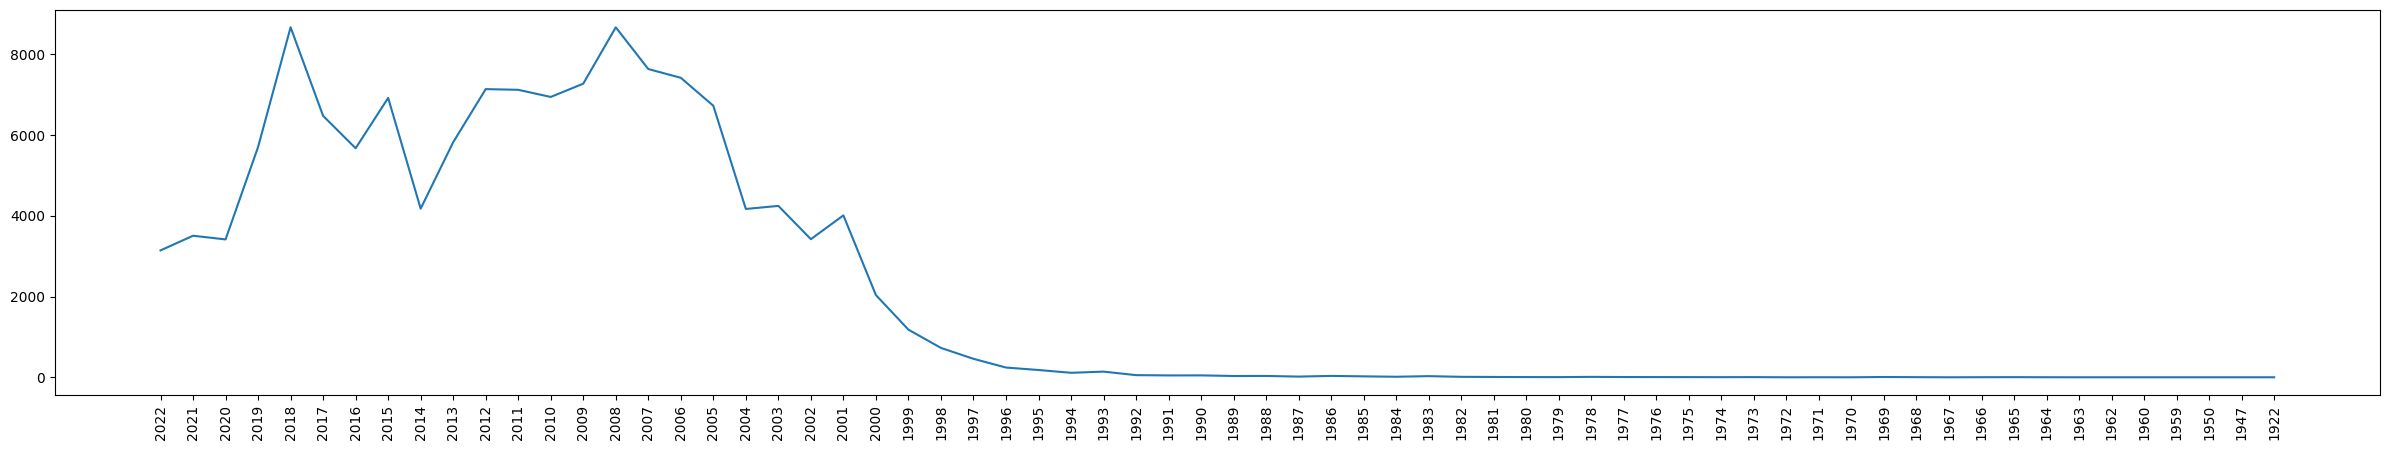

In [29]:
print("전처리 전 데이터 수 : %d 개\n전처리 후 데이터 수 : %d 개\n삭제된 데이터 수 : %d 개" % (book_info.shape[0], book_info2.shape[0], book_info.shape[0]-book_info2.shape[0]))
print(sorted(set(book_info2["publish_year"])))
plt.figure(figsize = (30,5))
plt.plot(book_info2["publish_year"].value_counts().sort_index(ascending = False))
plt.xticks(rotation = 90);

## **_kdc**

In [30]:
### 50회 초과 출판된 KDC 분류만 추출
kdc_50 = book_info2["kdc"].value_counts()[book_info2["kdc"].value_counts() > 50].index

In [31]:
book_info3= book_info2[book_info2["kdc"].isin(kdc_50)].reset_index(drop = True)
print("전처리 전 데이터 수 : %d 개\n전처리 후 데이터 수 : %d 개\n삭제된 데이터 수 : %d 개" % (book_info2.shape[0], book_info3.shape[0], book_info2.shape[0]-book_info3.shape[0]))
book_info3.head(3)

전처리 전 데이터 수 : 133743 개
전처리 후 데이터 수 : 111696 개
삭제된 데이터 수 : 22047 개


,book_key,isbn13,title,author,publisher,publish_year,ea_add_code,kdc,kdc_title,vol,publish_year_select
0,20258227,NaN,(EBS) 책과 함께하는 세상,EBS 기획,놀(다산북스),2006,NaN,802,"문장작법, 수사학",6,1
1,20258228,NaN,(EBS) 책과 함께하는 세상,EBS 기획,놀(다산북스),2006,NaN,802,"문장작법, 수사학",7,1
2,20246482,NaN,(MBC) 머털도사 BOX SET,황선길 감독;이두호 원작,놀(다산북스),2007,NaN,688,영화,2,1


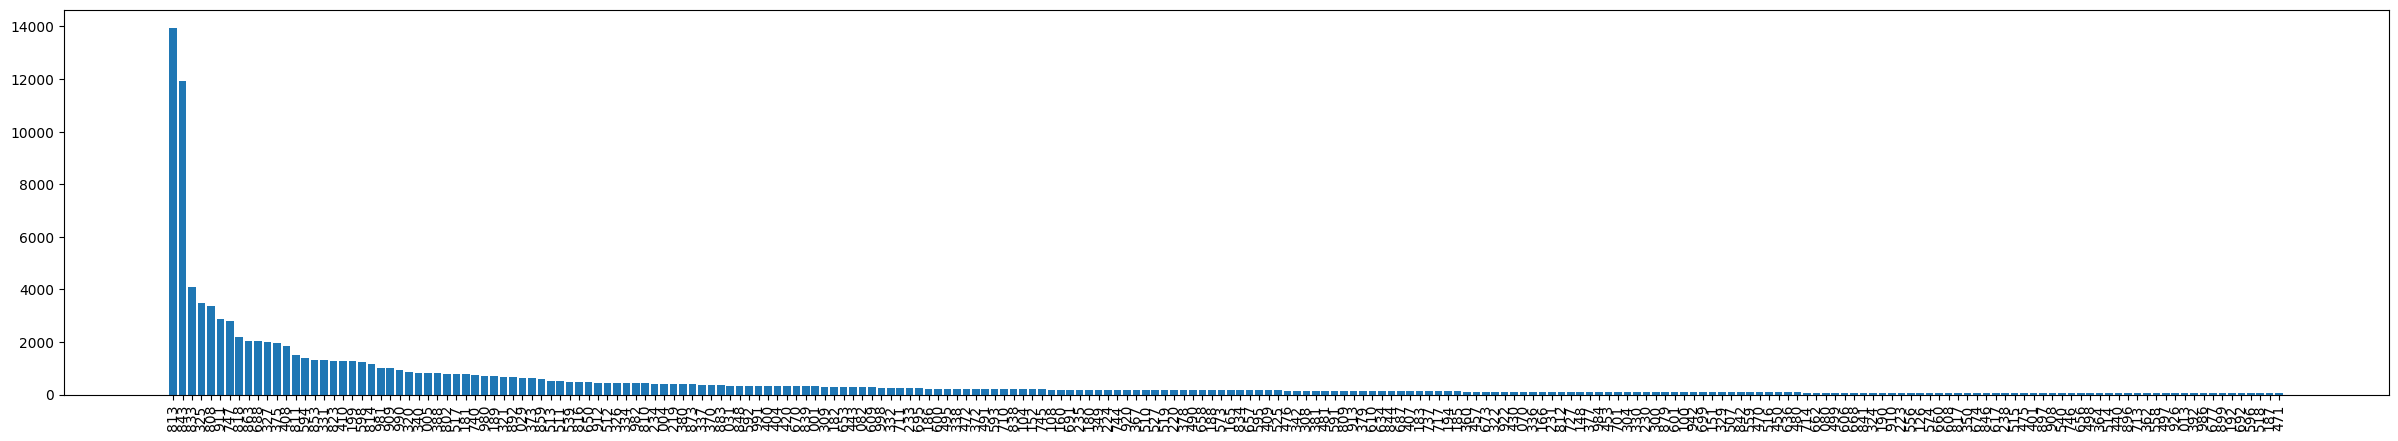

In [32]:
plt.figure(figsize = (30,5))
plt.bar(book_info3["kdc"].value_counts().index, book_info3["kdc"].value_counts().values)
plt.xticks(rotation = 90);

In [33]:
book_info3["kdc"].value_counts()

813    13942
843    11941
833     4098
325     3493
808     3354
       ...  
692       52
596       52
518       51
187       51
471       51
Name: kdc, Length: 224, dtype: int64

In [35]:
# ### 수정된 Book Info 저장
# book_info3.to_csv("../DAT/Second/book_info(final).csv", index = False)

# **User Information**

## **_Gender**

In [58]:
user_info["gender"].unique()

array(['여', '남', nan], dtype=object)

In [59]:
### 성별이 표시된 데이터만 추출
user_info2 = user_info[user_info["gender"].isin(["남", "여"])].reset_index(drop = True)
print("전처리 전 데이터 수 : %d 개\n전처리 후 데이터 수 : %d 개\n삭제된 데이터 수 : %d 개" % (user_info.shape[0], user_info2.shape[0], user_info.shape[0]-user_info2.shape[0]))

전처리 전 데이터 수 : 85345 개
전처리 후 데이터 수 : 84986 개
삭제된 데이터 수 : 359 개


## **_Birth year**

In [60]:
user_info["birth_year"].unique()

array([1979., 1971., 1958., 1974., 1995., 2010., 1973., 2007., 1986.,
       1981., 1976., 1988., 1987., 1985., 1972., 1991., 1992., 1998.,
       1994., 1978., 1993., 1989., 2015., 1982., 1990., 1977., 1968.,
       1983., 1975., 2011., 2004., 2016., 1997., 1999., 2002., 1965.,
       1962., 2013., 2008., 1967., 1996., 1949., 1984., 2001., 2005.,
       2003., 2009., 2006., 1969., 2000., 1970., 1980., 1966., 2012.,
       1959., 1954., 1960., 1957., 1964., 1963., 1946., 2014., 1932.,
       2017., 1961., 1941., 1956., 1955., 1952., 1939., 2019., 1904.,
       1951., 2018., 1944., 1940., 1943., 1947., 1948., 1953.,   nan,
       1950., 1942., 1930., 2020., 2022., 1804., 1935., 1936., 1945.,
       1929., 1911., 1811., 2021., 1810., 1931., 1937., 1809., 1934.,
       1938., 1927., 1933., 1906., 2094., 2064., 1895.])

In [74]:
### 1세~90세인 사람만 추출
birth_ = [float(i) for i in range(1934, 2023)]
print(min(birth_), max(birth_))

1934.0 2022.0


In [75]:
user_info3 = user_info2[user_info2["birth_year"].isin(birth_)].reset_index(drop = True)
user_info3["birth_year"] = user_info3["birth_year"].astype("int")
display(user_info3.head(3))

,user_key,birth_year,gender
0,0000CCE14AB439CCAADE8E9720A42D436E0AE368,1979,여
1,0004151605B53F229A16F0C969293837F8C21605,1971,여
2,0004C8AB201644C33BE2832F4B28807E8A6D5CC6,1958,남


In [76]:
print(user_info3["birth_year"].unique().min())
print(user_info3["birth_year"].unique().max())

1934
2022


전처리 전 데이터 수 : 84986 개
전처리 후 데이터 수 : 84919 개
삭제된 데이터 수 : 67 개


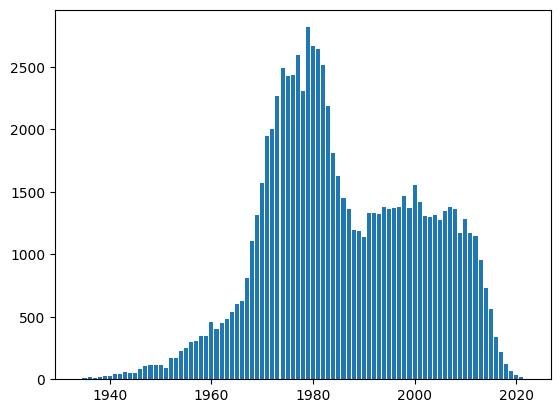

In [77]:
print("전처리 전 데이터 수 : %d 개\n전처리 후 데이터 수 : %d 개\n삭제된 데이터 수 : %d 개" % (user_info2.shape[0], user_info3.shape[0], user_info2.shape[0]-user_info3.shape[0]))
plt.bar(user_info3["birth_year"].value_counts().index, user_info3["birth_year"].value_counts().values);

In [78]:
user_info3.isnull().sum()

user_key      0
birth_year    0
gender        0
dtype: int64

In [79]:
# ### 수정된 User Info 저장
# user_info3.to_csv("../DAT/Second/user_info(final).csv", index = False)

# **Info가 있는 데이터만 추출**

- 대여 데이터 세트 중 Info가 있는 사용자와 도서만 추출

In [80]:
non_book = list(set(loan["book_key"]) - set(book_info3["book_key"]))
non_book[:3]

[406847490, 102760451, 406847494]

In [81]:
non_user = list(set(loan["user_key"]) - set(user_info3["user_key"]))
non_user[:3]

['722E244AAD4B0621A1BD07A517BBE7A2F05CBBF8',
 '14111670B4EBA9535C510554021D2EE6D895597A',
 'DE9713EBE7AA33183D9CCC64050FD655D457F1E5']

In [82]:
loan2 = loan.drop(index = loan[loan["book_key"].isin(non_book)].index)
loan2.drop(index = loan2[loan2["user_key"].isin(non_user)].index, inplace = True)
loan2.reset_index(drop = True, inplace = True)
print(loan.shape, loan2.shape)
print("기존 데이터 수 %d개 제거 후 %d개 (%d개 제거)" % (loan.shape[0], loan2.shape[0], loan.shape[0] - loan2.shape[0]))

(5348638, 4) (568787, 4)
기존 데이터 수 5348638개 제거 후 568787개 (4779851개 제거)


In [83]:
print("대여 데이터 첫 전처리 후 사용자 수 : {}명".format(loan2["user_key"].nunique()) )
print("대여 데이터 첫 전처리 후 도서 수 : {}권".format(loan2["book_key"].nunique()) )

대여 데이터 첫 전처리 후 사용자 수 : 38507명
대여 데이터 첫 전처리 후 도서 수 : 111028권


# **대출 횟수 기준으로 데이터 선택**

- 12회 이상 대여된 도서와 3권 이상 대여한 사용자만 사용

In [84]:
loan3 = loan2.copy()
# loan3.head(3)

In [85]:
### 12회 이상 대여된 도서만 추출
book_idx_5 = loan3["book_key"].value_counts()[(loan3["book_key"].value_counts() >= 12)].index
cond1 = loan3["book_key"].isin(book_idx_5)
loan4 = loan3[cond1].reset_index(drop = True)

### 3회 이상 대여한 사용자만 추출
user_idx_5 = loan4["user_key"].value_counts()[(loan4["user_key"].value_counts() >= 3)].index
cond2 = loan4["user_key"].isin(user_idx_5)
loan5 = loan4[cond2].reset_index(drop = True)

In [86]:
print("두번째 전처리 후 사용자 수 : {}명".format(loan5["user_key"].nunique()))
print("두번째 전처리 후 도서 수 : {}권".format(loan5["book_key"].nunique()) )

두번째 전처리 후 사용자 수 : 17137명
두번째 전처리 후 도서 수 : 11494권


In [87]:
min_book = loan5["book_key"].value_counts().min()
min_user = loan5["user_key"].value_counts().min()
sparsity = (1 - len(loan5) / (loan5['user_key'].nunique() * loan5['book_key'].nunique()))

print("사용자 최소 이용 수 : ", min_user)
print("책 최소 대여 수 : ", min_book) ### 12권 이상 대여된 도서 중 3권 이상 대여한 사용자가 대여한 횟수
print(f'행렬의 희소성: {sparsity:.4f}')

사용자 최소 이용 수 :  3
책 최소 대여 수 :  3
행렬의 희소성: 0.9989


In [1691]:
print(loan5["user_key"].value_counts().max())
print(loan5["user_key"].value_counts().mean())
print(loan5["book_key"].value_counts().mean())

501
12.318357092778687
18.373943355119827


In [88]:
# loan5.head(3)

In [89]:
# ### 수정된 loan data 저장
# loan5.to_csv("../DAT/Second/loan_cond.csv", index = False)  

# **시각화**

In [97]:
plt.rc('font', family = 'Malgun Gothic') 
print(plt.rcParams['font.family'])

['Malgun Gothic']


## **_파생변수 생성**

In [100]:
book_info_ = book_info3.copy()

### ISBN13 변수로 출판 국가(nation) 변수 생성
book_info_["isbn13"] = book_info_["isbn13"].fillna("666666666")
book_info_["nation"] = book_info_['isbn13'].str.slice(start = 3, stop = 5).astype(int)

nation_100_ = book_info_["nation"].value_counts()[book_info_["nation"].value_counts() < 100].index
book_info_["nation"] = np.select([book_info_["nation"].isin(nation_100_)], [9999], book_info_["nation"])

### 200회 미만의 kdc 값은 kdc etc로 변환
kdc_150_ = book_info_.kdc.value_counts()[book_info_.kdc.value_counts() < 200].index
book_info_["kdc"] = np.select([book_info_["kdc"].isin(kdc_150_)], ["kdc etc"], book_info_["kdc"])

### 도서별 대여된 횟수
loan_cnt_info = pd.DataFrame(loan5["book_key"].value_counts().values).value_counts().sort_index(ascending = False)

## **_그래프 그리기**

In [101]:
### 사용자의 나이, 성별 정보
user_age_info = user_info3[user_info3["user_key"].isin(loan5.user_key.unique())].birth_year.value_counts().sort_index(ascending = False)
user_gender_info = user_info3[user_info3["user_key"].isin(loan5.user_key.unique())].gender.value_counts().sort_index(ascending = False)
print(user_age_info.index.min(), user_age_info.index.max())
print(user_gender_info)


### 도서의 출판연도, kdc, 국가 정보
book_year_info = book_info_[book_info_["book_key"].isin(loan5.book_key.unique())].publish_year.value_counts().sort_index(ascending = False)
book_kdc_info = book_info_[book_info_["book_key"].isin(loan5.book_key.unique())].kdc.value_counts().sort_index(ascending = False)

book_nation_info = book_info_[book_info_["book_key"].isin(loan5.book_key.unique())].nation.value_counts().sort_index(ascending = False)
book_nation_info.index = ["None"] + list(ascii_uppercase)[:len(book_nation_info.index)-1]

1934 2021
여    11276
남     5861
Name: gender, dtype: int64


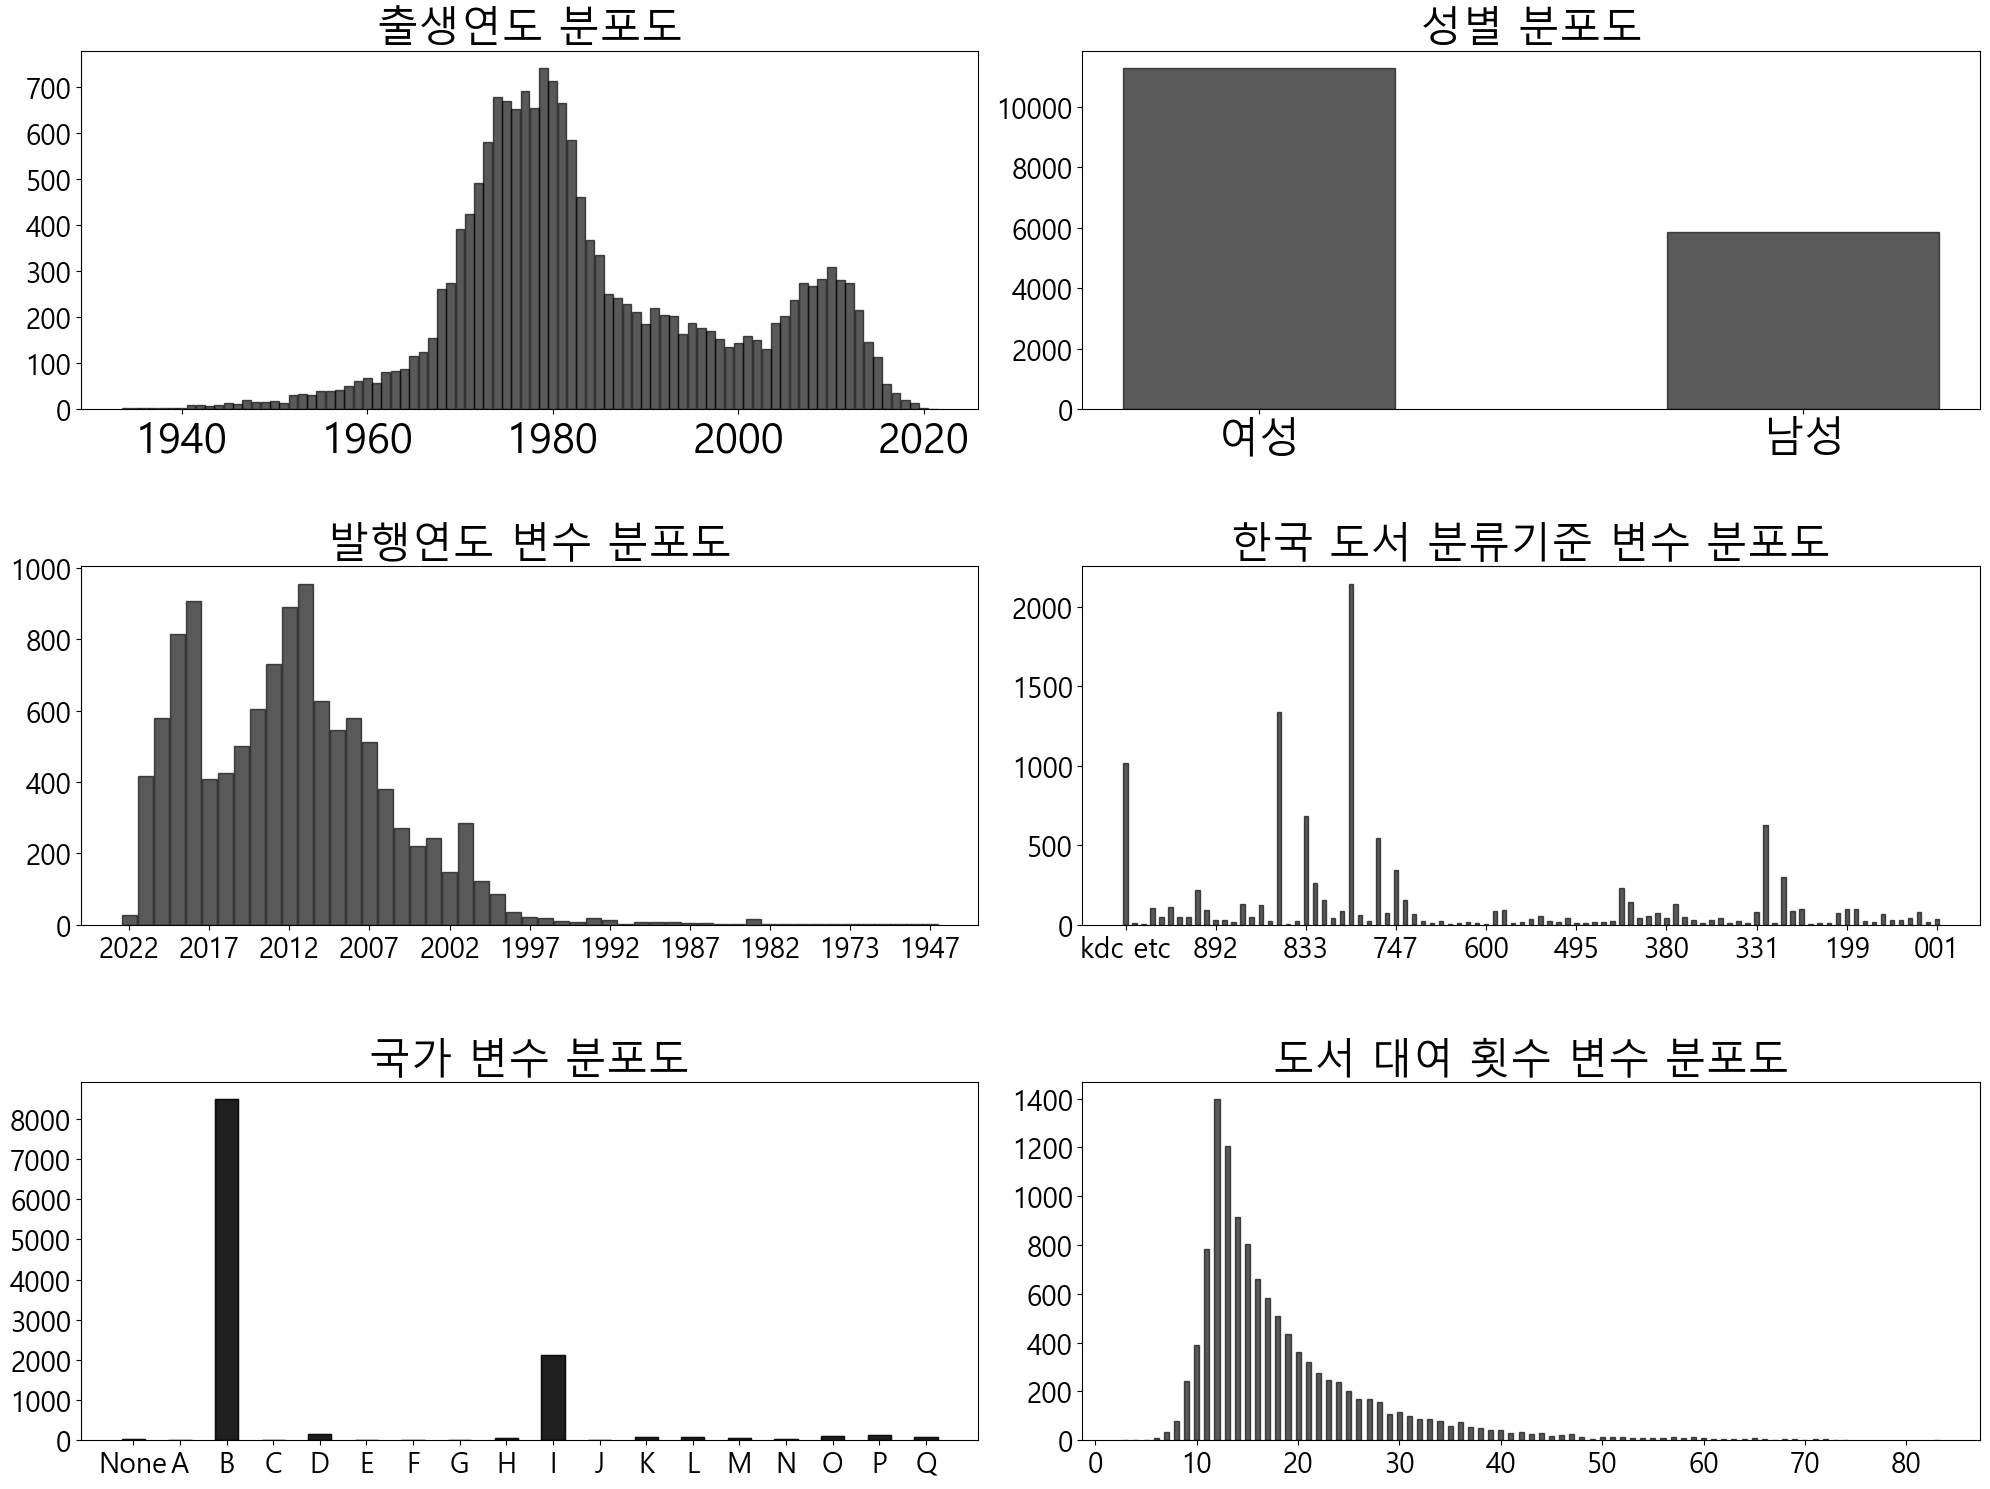

In [103]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
plt.bar(user_age_info.index, user_age_info.values, 
        color = "black", alpha = 0.65, width = 0.95, edgecolor='black')
plt.xticks(fontsize = 30); plt.yticks(fontsize = 20)
plt.title("출생연도 분포도", fontsize = 30)

plt.subplot(3,2,2)
plt.bar(user_gender_info.index, user_gender_info.values,
        color = "black", alpha = 0.65, width = 0.5, edgecolor='black')
plt.xticks([0,1], ["여성", "남성"])
plt.xticks(fontsize = 30); plt.yticks(fontsize = 20)
plt.title("성별 분포도", fontsize = 30)


plt.subplot(3,2,3)
plt.bar(book_year_info.index, book_year_info.values, 
        color = "black", alpha = 0.65, width = 0.95, edgecolor='black')
plt.xticks(list(range(0, len(book_year_info.index), 5)), fontsize = 20, rotation = 0); plt.yticks(fontsize = 20)
plt.title("발행연도 변수 분포도", fontsize = 30)

plt.subplot(3,2,4)
plt.bar(book_kdc_info.index, book_kdc_info.values,
        color = "black", alpha = 0.65, width = 0.5, edgecolor='black')
plt.xticks(list(range(0, len(book_kdc_info.index), 10)), 
           fontsize = 20, rotation = 0); plt.yticks(fontsize = 20)
plt.title("\n한국 도서 분류기준 변수 분포도", fontsize = 30)

plt.subplot(3,2,5)
plt.bar(book_nation_info.index, book_nation_info.values,
        color = "black", alpha = 0.65, width = 0.5, edgecolor='black')
plt.xticks(fontsize = 20, rotation = 0); plt.yticks(fontsize = 20)
plt.title("\n국가 변수 분포도", fontsize = 30)

plt.subplot(3,2,5)
plt.bar(book_nation_info.index, book_nation_info.values,
        color = "black", alpha = 0.65, width = 0.5, edgecolor='black')
plt.xticks(fontsize = 20, rotation = 0); plt.yticks(fontsize = 20)
plt.title("\n국가 변수 분포도", fontsize = 30)

plt.subplot(3,2,6)
plt.bar([i[0] for i in loan_cnt_info.index], loan_cnt_info.values,
        color = "black", alpha = 0.65, width = 0.5, edgecolor='black')
plt.xticks(fontsize = 20, rotation = 0); plt.yticks(fontsize = 20)
plt.title("\n도서 대여 횟수 변수 분포도", fontsize = 30)

plt.tight_layout();